In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing libraries
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
import json
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
from tqdm import tqdm
%matplotlib inline

C:\Users\ojhag\AppData\Local\Temp\ipykernel_15888\1147547568.py:9: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [ ]:
# function to create density maps for images
def gaussian_filter_density(gt):
    print (gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print ('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print ('done.')
    return density

In [ ]:
#set the root to the Shanghai dataset you download
root = 'dataset/'

In [ ]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_train,part_A_test]

In [ ]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [ ]:
for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

dataset/part_A_final/train_data\images\IMG_1.jpg
(768, 1024)
generate density...


C:\Users\ojhag\AppData\Local\Temp\ipykernel_12216\4212836471.py:24: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')


done.
dataset/part_A_final/train_data\images\IMG_10.jpg
(683, 1024)
generate density...
done.
dataset/part_A_final/train_data\images\IMG_100.jpg
(654, 1024)
generate density...
done.
dataset/part_A_final/train_data\images\IMG_101.jpg
(768, 1024)
generate density...
done.
dataset/part_A_final/train_data\images\IMG_102.jpg
(768, 1024)
generate density...
done.
dataset/part_A_final/train_data\images\IMG_103.jpg
(400, 400)
generate density...
done.
dataset/part_A_final/train_data\images\IMG_104.jpg
(405, 540)
generate density...
done.
dataset/part_A_final/train_data\images\IMG_105.jpg
(632, 990)
generate density...
done.
dataset/part_A_final/train_data\images\IMG_106.jpg
(675, 1024)
generate density...
done.
dataset/part_A_final/train_data\images\IMG_107.jpg
(517, 800)
generate density...
done.
dataset/part_A_final/train_data\images\IMG_108.jpg
(767, 1024)
generate density...
done.
dataset/part_A_final/train_data\images\IMG_109.jpg
(681, 1024)
generate density...
done.
dataset/part_A_final

KeyboardInterrupt: 

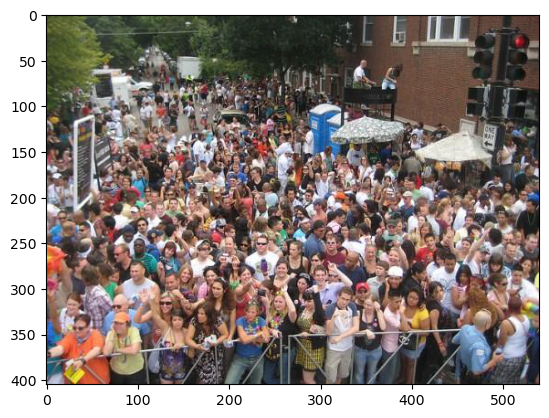

In [ ]:
#now see a sample from ShanghaiA
plt.imshow(Image.open(img_paths[6]))

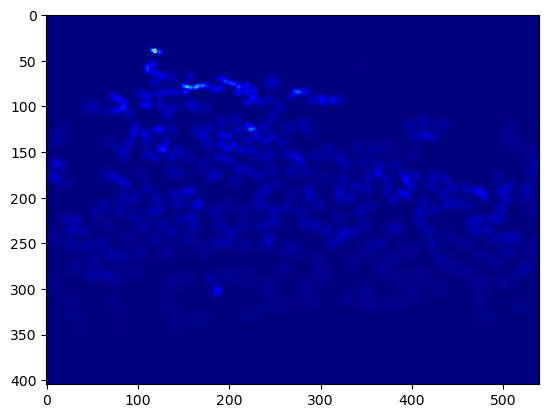

In [ ]:
gt_file = h5py.File(img_paths[6].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [ ]:
np.sum(groundtruth)# don't mind this slight variation

370.0633

In [ ]:
path_sets = [part_B_train,part_B_test]

In [ ]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [ ]:
for img_path in img_paths:
    print img_path
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter(k,15)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

TESTING


In [ ]:
img_paths

['dataset/part_A_final/train_data\\images\\IMG_1.jpg',
 'dataset/part_A_final/train_data\\images\\IMG_10.jpg',
 'dataset/part_A_final/train_data\\images\\IMG_100.jpg',
 'dataset/part_A_final/train_data\\images\\IMG_101.jpg',
 'dataset/part_A_final/train_data\\images\\IMG_102.jpg',
 'dataset/part_A_final/train_data\\images\\IMG_103.jpg',
 'dataset/part_A_final/train_data\\images\\IMG_104.jpg',
 'dataset/part_A_final/train_data\\images\\IMG_105.jpg',
 'dataset/part_A_final/train_data\\images\\IMG_106.jpg',
 'dataset/part_A_final/train_data\\images\\IMG_107.jpg',
 'dataset/part_A_final/train_data\\images\\IMG_108.jpg',
 'dataset/part_A_final/train_data\\images\\IMG_109.jpg',
 'dataset/part_A_final/train_data\\images\\IMG_11.jpg',
 'dataset/part_A_final/train_data\\images\\IMG_110.jpg',
 'dataset/part_A_final/train_data\\images\\IMG_111.jpg',
 'dataset/part_A_final/train_data\\images\\IMG_112.jpg',
 'dataset/part_A_final/train_data\\images\\IMG_113.jpg',
 'dataset/part_A_final/train_data\\

In [4]:
%pwd

'/content/drive/MyDrive/CSRNet-pytorch'

In [3]:
%cd '/content/drive/MyDrive/CSRNet-pytorch'

/content/drive/MyDrive/CSRNet-pytorch


In [5]:
!python train.py part_A_train.json part_A_val.json 0 0

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100% 528M/528M [00:05<00:00, 92.9MB/s]
Traceback (most recent call last):
  File "/content/drive/MyDrive/CSRNet-pytorch/train.py", line 230, in <module>
    main()        
  File "/content/drive/MyDrive/CSRNet-pytorch/train.py", line 67, in main
    model 